In [7]:
import requests
import pandas as pd
import numpy as np

In [8]:
r = requests.get("https://api.alternative.me/fng/?limit=0")
df = pd.DataFrame(r.json()["data"])


In [9]:
df["value"] = df["value"].astype(int)
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
# rename
df = df.rename(
    columns={
        "value": "fear_and_greed_value",
        "value_classification": "fear_and_greed_class",
    }
)
# convert class to categories
df["fear_and_greed_class"] = pd.Categorical(
    df["fear_and_greed_class"],
)
df.head()


,fear_and_greed_value,fear_and_greed_class,timestamp,time_until_update
0,23,Extreme Fear,2022-10-20,54149
1,23,Extreme Fear,2022-10-19,NaN
2,22,Extreme Fear,2022-10-18,NaN
3,20,Extreme Fear,2022-10-17,NaN
4,24,Extreme Fear,2022-10-16,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fear_and_greed_value  1720 non-null   int64         
 1   fear_and_greed_class  1720 non-null   category      
 2   timestamp             1720 non-null   datetime64[ns]
 3   time_until_update     1 non-null      object        
dtypes: category(1), datetime64[ns](1), int64(1), object(1)
memory usage: 42.3+ KB


<AxesSubplot:xlabel='timestamp'>

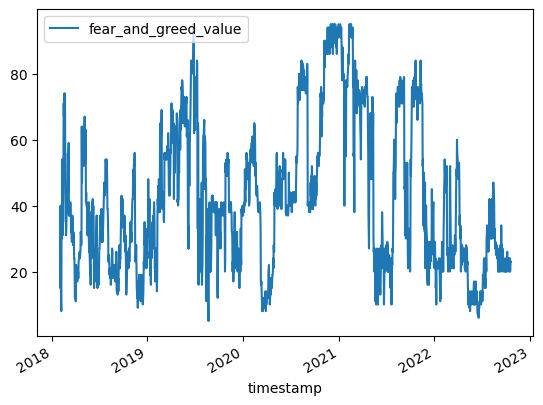

In [11]:
df.plot(x="timestamp", y="fear_and_greed_value")


In [12]:
from pathlib import Path

save_dir = Path("/home/yangzhe/data/external_data")
save_dir.mkdir(exist_ok=True, parents=True)
save_path = save_dir / "fear_and_greed_index.feather"
df.to_feather(save_path)
